In [1]:
import numpy as np
from sklearn.impute import KNNImputer
import pandas as pd
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,f1_score,recall_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import warnings

C:\New folder\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\dkdes\OneDrive\Desktop\kaggle_datasets\ad click prediction.csv")
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [4]:
df=df.drop(["id","full_name"],axis=1)
df.head()

,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,NaN,Male,Desktop,Top,NaN,NaN,1
2,41.0,Non-Binary,NaN,Side,Education,Night,1
3,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               5234 non-null   float64
 1   gender            5307 non-null   object 
 2   device_type       8000 non-null   object 
 3   ad_position       8000 non-null   object 
 4   browsing_history  5218 non-null   object 
 5   time_of_day       8000 non-null   object 
 6   click             10000 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 547.0+ KB


In [6]:
df.isna().sum()

age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64

In [7]:
df.describe()

,age,click
count,5234.000000,10000.000000
mean,40.197363,0.650000
std,13.126420,0.476993
min,18.000000,0.000000
25%,29.000000,0.000000
50%,39.500000,1.000000
75%,52.000000,1.000000
max,64.000000,1.000000


In [8]:
df['click'].value_counts()

1    6500
0    3500
Name: click, dtype: int64

In [9]:
df.isnull

<bound method DataFrame.isnull of        age      gender device_type ad_position browsing_history time_of_day  \
0     22.0         NaN     Desktop         Top         Shopping   Afternoon   
1      NaN        Male     Desktop         Top              NaN         NaN   
2     41.0  Non-Binary         NaN        Side        Education       Night   
3     34.0        Male         NaN         NaN    Entertainment     Evening   
4     39.0  Non-Binary         NaN         NaN     Social Media     Morning   
...    ...         ...         ...         ...              ...         ...   
9995   NaN         NaN      Mobile         Top        Education         NaN   
9996   NaN      Female     Desktop      Bottom    Entertainment         NaN   
9997   NaN        Male      Mobile        Side              NaN     Morning   
9998   NaN         NaN     Desktop         NaN         Shopping     Morning   
9999  44.0        Male      Tablet         Top     Social Media     Morning   

      click  
0  

<Axes: xlabel='click', ylabel='count'>

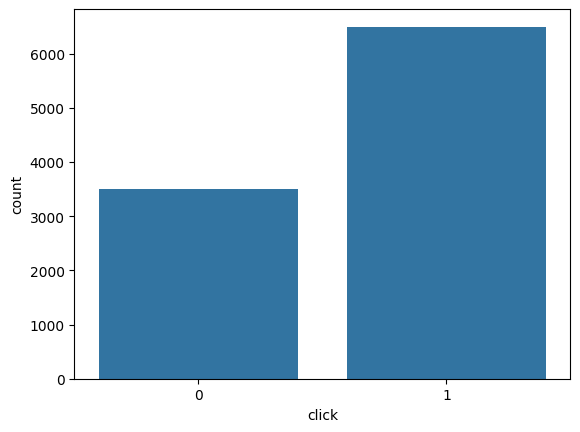

In [10]:
sns.countplot(x='click', data=df)

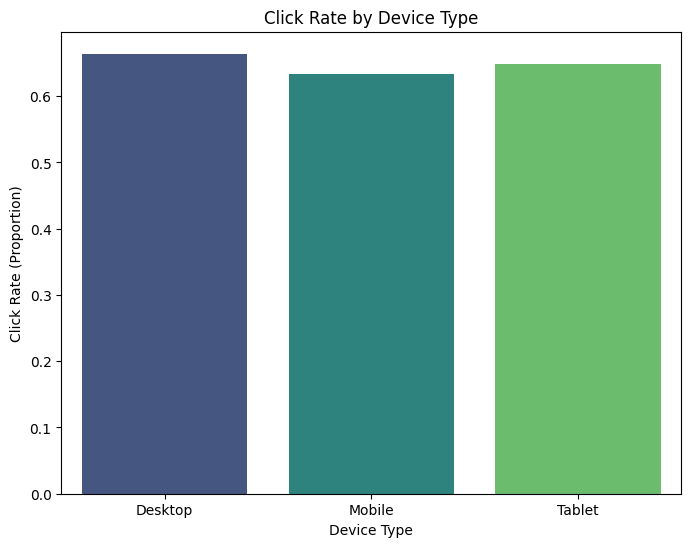

In [11]:
df_grouped = df.groupby('device_type')['click'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='device_type', y='click', data=df_grouped, palette='viridis')
plt.title('Click Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Click Rate (Proportion)')
plt.show()

In [12]:
df['gender'].value_counts()

Female        1834
Male          1810
Non-Binary    1663
Name: gender, dtype: int64

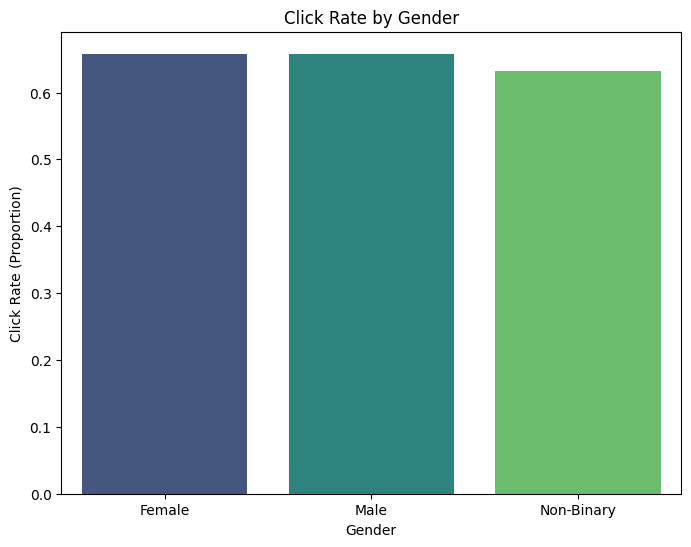

In [13]:
df_grouped = df.groupby('gender')['click'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='gender', y='click', data=df_grouped, palette='viridis')
plt.title('Click Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Click Rate (Proportion)')
plt.show()


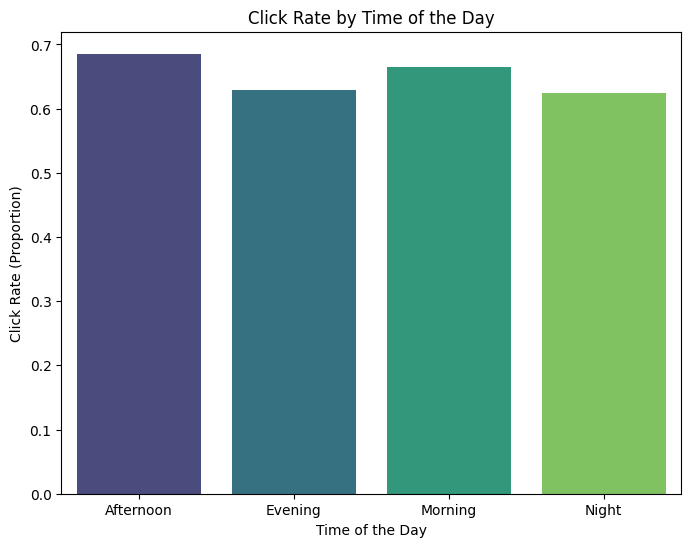

In [14]:
# Calculate the proportion of clicks
df_grouped = df.groupby('time_of_day')['click'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='time_of_day', y='click', data=df_grouped, palette='viridis')
plt.title('Click Rate by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Click Rate (Proportion)')
plt.show()


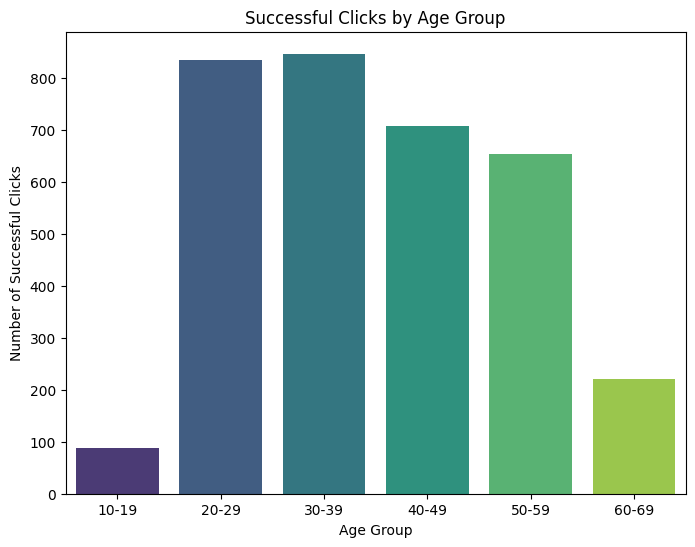

In [15]:
bins=[10,20,30,40,50,60,70]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69']
age_group_success = df.groupby(pd.cut(df['age'], bins=bins,labels=labels, right=False))['click'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='age', y='click', data=age_group_success, palette='viridis')
plt.title('Successful Clicks by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Successful Clicks')
plt.show()

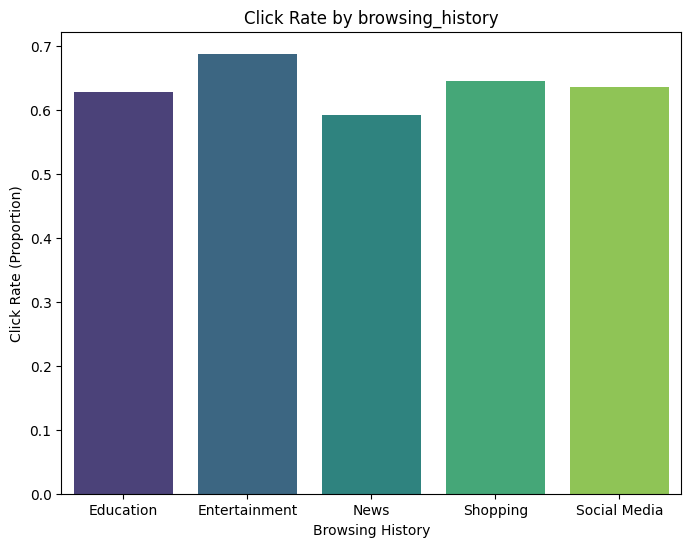

In [16]:
df_grouped = df.groupby('browsing_history')['click'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='browsing_history', y='click', data=df_grouped, palette='viridis')
plt.title('Click Rate by browsing_history')
plt.xlabel('Browsing History')
plt.ylabel('Click Rate (Proportion)')
plt.show()

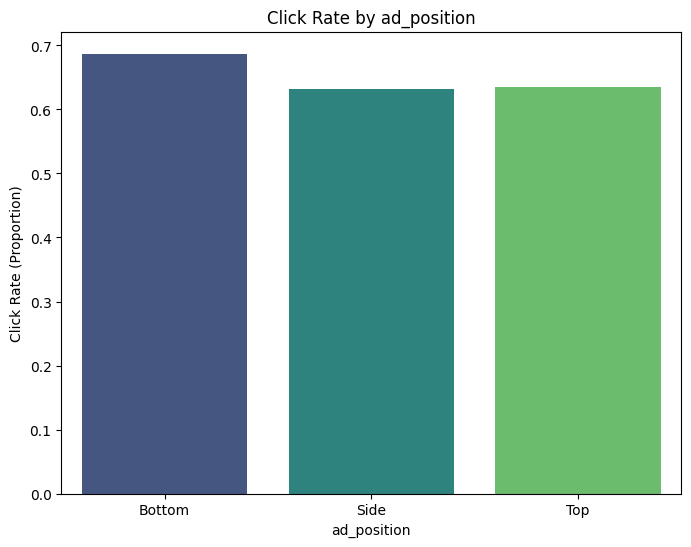

In [17]:
df_grouped = df.groupby('ad_position')['click'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='ad_position', y='click', data=df_grouped, palette='viridis')
plt.title('Click Rate by ad_position')
plt.xlabel('ad_position')
plt.ylabel('Click Rate (Proportion)')
plt.show()

In [18]:
X = df.drop(columns=['click'])
y = df['click'] 
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) 
])

pre_encoding = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, ['age']),
        ('cat', categorical_transformer, ['gender','device_type','ad_position','browsing_history','time_of_day'])
    ]
)

knn_imputer = KNNImputer(n_neighbors=3)
pipeline = Pipeline(steps=[
    ('pre_encoding', pre_encoding),
    ('knn_imputer', knn_imputer)  
])

X_transformed = pipeline.fit_transform(X)
encoder = pipeline.named_steps['pre_encoding'].transformers_[1][1].named_steps['encoder']
one_hot_columns = encoder.get_feature_names_out(['gender','device_type','ad_position','browsing_history','time_of_day'])

columns = ['age'] + list(one_hot_columns)

X_transformed_df = pd.DataFrame(X_transformed, columns=columns)

df_final = pd.concat([X_transformed_df, y.reset_index(drop=True)], axis=1)

print(df_final)



           age  gender_Female  gender_Male  gender_Non-Binary  gender_nan  \
0    -1.386448            0.0          0.0                0.0         1.0   
1     0.137342            0.0          1.0                0.0         0.0   
2     0.061152            0.0          0.0                1.0         0.0   
3    -0.472174            0.0          1.0                0.0         0.0   
4    -0.091227            0.0          0.0                1.0         0.0   
...        ...            ...          ...                ...         ...   
9995  0.594479            0.0          0.0                0.0         1.0   
9996 -0.802329            1.0          0.0                0.0         0.0   
9997 -0.929311            0.0          1.0                0.0         0.0   
9998 -0.269002            0.0          0.0                0.0         1.0   
9999  0.289721            0.0          1.0                0.0         0.0   

      device_type_Desktop  device_type_Mobile  device_type_Tablet  \
0     

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             10000 non-null  float64
 1   gender_Female                   10000 non-null  float64
 2   gender_Male                     10000 non-null  float64
 3   gender_Non-Binary               10000 non-null  float64
 4   gender_nan                      10000 non-null  float64
 5   device_type_Desktop             10000 non-null  float64
 6   device_type_Mobile              10000 non-null  float64
 7   device_type_Tablet              10000 non-null  float64
 8   device_type_nan                 10000 non-null  float64
 9   ad_position_Bottom              10000 non-null  float64
 10  ad_position_Side                10000 non-null  float64
 11  ad_position_Top                 10000 non-null  float64
 12  ad_position_nan                 1

In [20]:
X_new=df_final.drop(['click'],axis=1)
y_new=df_final['click']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.2)

In [22]:
def classifier_metrics(model):
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)
    cr=classification_report(y_test , y_pred)
    cv = cross_val_score(model,X_new,y_new,scoring="accuracy")
    f1=f1_score(y_test,y_pred)
    print("Testing accuracy:",np.mean(cv))
    print("testing f1_score:",f1)
    print("Classification report \n:",cr)
    matrix =confusion_matrix(y_test , y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    print("----Model on Training data-----")
    y_train_pred = model.predict(X_train)
    training_classification_report=classification_report(y_train , y_train_pred)
    training_accuracy=cross_val_score(model,X_train,y_train,scoring='accuracy')
    training_f1=f1_score(y_train,y_train_pred)
    print("Training accuracy score:",np.mean(training_accuracy))
    print("Training classification Report \n:",training_classification_report)
    print("training f1_score:",training_f1)

Testing accuracy: 0.7019
testing f1_score: 0.806098773616175
Classification report 
:               precision    recall  f1-score   support

           0       0.70      0.29      0.40       697
           1       0.71      0.93      0.81      1303

    accuracy                           0.71      2000
   macro avg       0.70      0.61      0.61      2000
weighted avg       0.70      0.71      0.67      2000



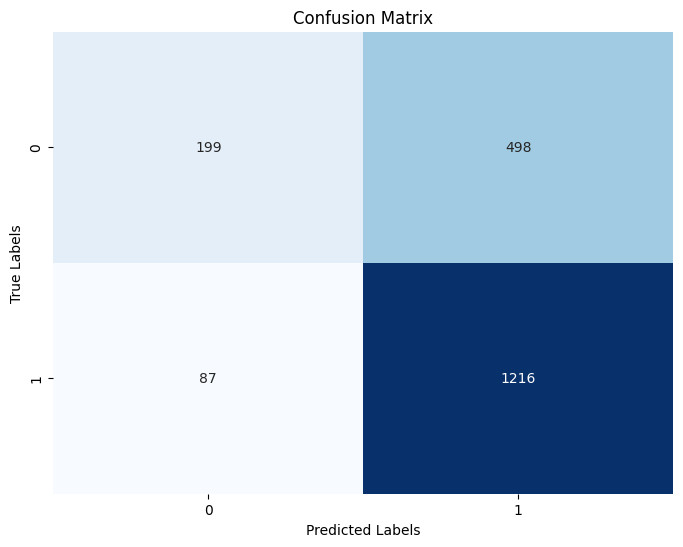

----Model on Training data-----
Training accuracy score: 0.6914999999999999
Training classification Report 
:               precision    recall  f1-score   support

           0       0.87      0.39      0.54      2803
           1       0.75      0.97      0.84      5197

    accuracy                           0.77      8000
   macro avg       0.81      0.68      0.69      8000
weighted avg       0.79      0.77      0.74      8000

training f1_score: 0.8430057027843005


In [23]:
rf=RandomForestClassifier(n_jobs=-1,n_estimators=700,max_features=None,min_samples_split=50)
classifier_metrics(rf)

Testing accuracy: 0.65
testing f1_score: 0.7889797154102332
Classification report 
:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       697
           1       0.65      1.00      0.79      1303

    accuracy                           0.65      2000
   macro avg       0.33      0.50      0.39      2000
weighted avg       0.42      0.65      0.51      2000



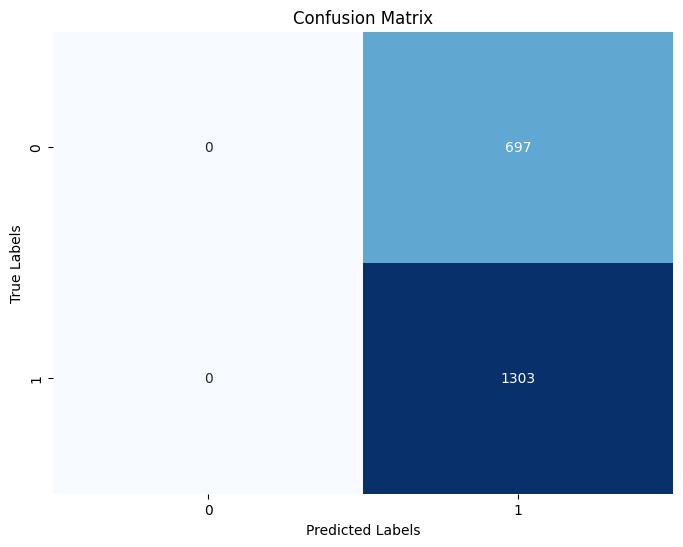

----Model on Training data-----
Training accuracy score: 0.649625
Training classification Report 
:               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2803
           1       0.65      1.00      0.79      5197

    accuracy                           0.65      8000
   macro avg       0.32      0.50      0.39      8000
weighted avg       0.42      0.65      0.51      8000

training f1_score: 0.7876032431613246


In [24]:
svm = SVC(C=10 ,gamma=0.001)
classifier_metrics(svm)

Testing accuracy: 0.6782999999999999
testing f1_score: 0.7815617475060199
Classification report 
:               precision    recall  f1-score   support

           0       0.58      0.33      0.42       697
           1       0.71      0.87      0.78      1303

    accuracy                           0.68      2000
   macro avg       0.64      0.60      0.60      2000
weighted avg       0.66      0.68      0.66      2000



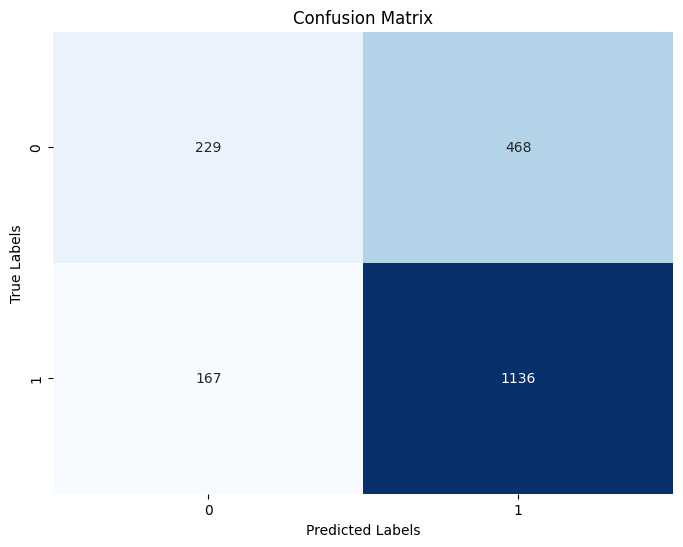

----Model on Training data-----
Training accuracy score: 0.6653749999999999
Training classification Report 
:               precision    recall  f1-score   support

           0       0.77      0.48      0.59      2803
           1       0.77      0.92      0.84      5197

    accuracy                           0.77      8000
   macro avg       0.77      0.70      0.72      8000
weighted avg       0.77      0.77      0.75      8000

training f1_score: 0.8386871508379888


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
classifier_metrics(knn)

Testing accuracy: 0.65
testing f1_score: 0.7881176113973931
Classification report 
:               precision    recall  f1-score   support

           0       0.25      0.00      0.00       697
           1       0.65      1.00      0.79      1303

    accuracy                           0.65      2000
   macro avg       0.45      0.50      0.40      2000
weighted avg       0.51      0.65      0.51      2000



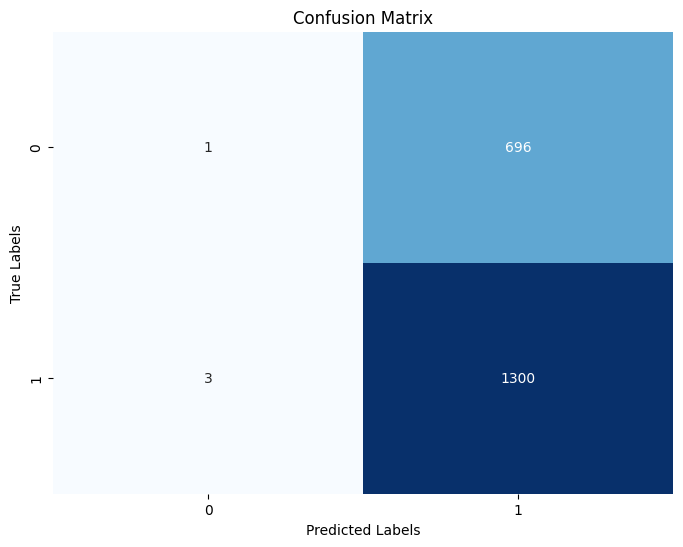

----Model on Training data-----
Training accuracy score: 0.648625
Training classification Report 
:               precision    recall  f1-score   support

           0       0.56      0.00      0.01      2803
           1       0.65      1.00      0.79      5197

    accuracy                           0.65      8000
   macro avg       0.61      0.50      0.40      8000
weighted avg       0.62      0.65      0.51      8000

training f1_score: 0.7874971549958273


In [26]:
lr = LogisticRegression()
classifier_metrics(lr)

In [27]:
estimators=[('lr',lr),('rf',rf),('knn',knn),('svm',svm)]

Testing accuracy: 0.6813
testing f1_score: 0.7989838043823436
Classification report 
:               precision    recall  f1-score   support

           0       0.71      0.16      0.26       697
           1       0.68      0.97      0.80      1303

    accuracy                           0.68      2000
   macro avg       0.69      0.56      0.53      2000
weighted avg       0.69      0.68      0.61      2000



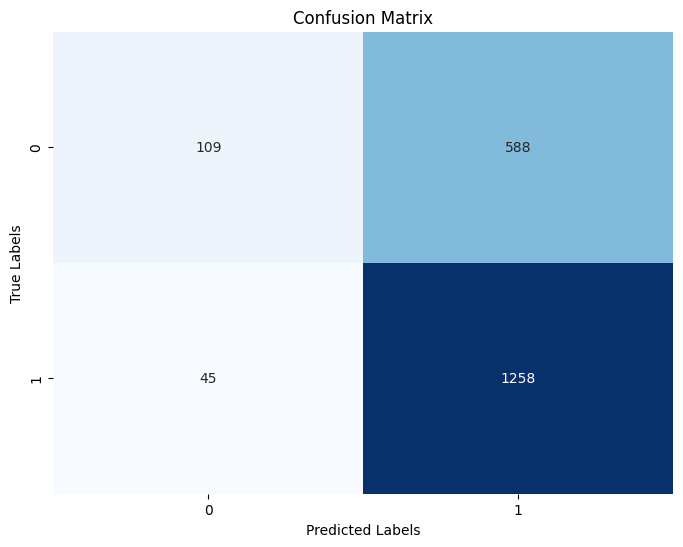

----Model on Training data-----
Training accuracy score: 0.672625
Training classification Report 
:               precision    recall  f1-score   support

           0       0.91      0.28      0.42      2803
           1       0.72      0.99      0.83      5197

    accuracy                           0.74      8000
   macro avg       0.81      0.63      0.63      8000
weighted avg       0.78      0.74      0.69      8000

training f1_score: 0.8295132420830971


In [28]:
VC=VotingClassifier(estimators=estimators , voting='hard')
classifier_metrics(VC)

## Applying Algorithms on Raw Data Without any Imputation

In [29]:
df_encoded = pd.get_dummies(df, columns=['gender', 'device_type', 'ad_position', 'browsing_history',
       'time_of_day'], dummy_na=True)
df_encoded

,age,click,gender_Female,gender_Male,gender_Non-Binary,gender_nan,device_type_Desktop,device_type_Mobile,device_type_Tablet,device_type_nan,...,browsing_history_Entertainment,browsing_history_News,browsing_history_Shopping,browsing_history_Social Media,browsing_history_nan,time_of_day_Afternoon,time_of_day_Evening,time_of_day_Morning,time_of_day_Night,time_of_day_nan
0,22.0,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,NaN,1,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,41.0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,34.0,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
4,39.0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9996,NaN,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9997,NaN,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
9998,NaN,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [30]:
X_new1=df_encoded.drop(['click'],axis=1)
y_new1=df_encoded['click']

In [31]:
X_train_new1,X_test_new1,y_train_new1,y_test_new1=train_test_split(X_new1,y_new1,test_size=0.2,random_state=42)

In [32]:
def classifier_metrics1(model):
    model.fit(X_train_new1 , y_train_new1)
    y_pred = model.predict(X_test_new1)
    cr=classification_report(y_test_new1 , y_pred)
    cv = cross_val_score(model,X_new1,y_new1,scoring="accuracy")
    f1=f1_score(y_test_new1,y_pred)
    print("Testing accuracy:",np.mean(cv))
    print("testing f1_score:",f1)
    print("Classification report \n:",cr)
    matrix =confusion_matrix(y_test_new1 , y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    print("----Model on Training data-----")
    y_train_pred = model.predict(X_train_new1)
    training_classification_report=classification_report(y_train_new1 , y_train_pred)
    training_accuracy=cross_val_score(model,X_train_new1,y_train_new1,scoring='accuracy')
    training_f1=f1_score(y_train_new1,y_train_pred)
    print("Training accuracy score:",np.mean(training_accuracy))
    print("Training classification Report \n:",training_classification_report)
    print("training f1_score:",training_f1)

Testing accuracy: 0.7128
testing f1_score: 0.8102094240837696
Classification report 
:               precision    recall  f1-score   support

           0       0.76      0.26      0.39       705
           1       0.70      0.96      0.81      1295

    accuracy                           0.71      2000
   macro avg       0.73      0.61      0.60      2000
weighted avg       0.72      0.71      0.66      2000



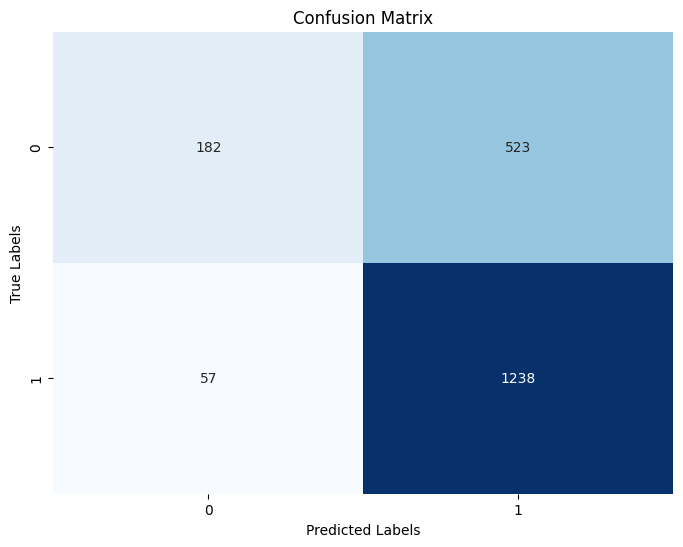

----Model on Training data-----
Training accuracy score: 0.6997500000000001
Training classification Report 
:               precision    recall  f1-score   support

           0       0.89      0.37      0.53      2795
           1       0.74      0.97      0.84      5205

    accuracy                           0.77      8000
   macro avg       0.82      0.67      0.69      8000
weighted avg       0.79      0.77      0.73      8000

training f1_score: 0.8436980379115397


In [33]:
rf1=RandomForestClassifier(n_jobs=-1,n_estimators=700,max_features=None,min_samples_split=50)
classifier_metrics1(rf1)

In [34]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(max_iter=500,max_leaf_nodes=32,l2_regularization=10)
hgb1=HistGradientBoostingClassifier()

Testing accuracy: 0.7401000000000001
testing f1_score: 0.81282316442606
Classification report 
:               precision    recall  f1-score   support

           0       0.71      0.39      0.51       705
           1       0.73      0.91      0.81      1295

    accuracy                           0.73      2000
   macro avg       0.72      0.65      0.66      2000
weighted avg       0.72      0.73      0.70      2000



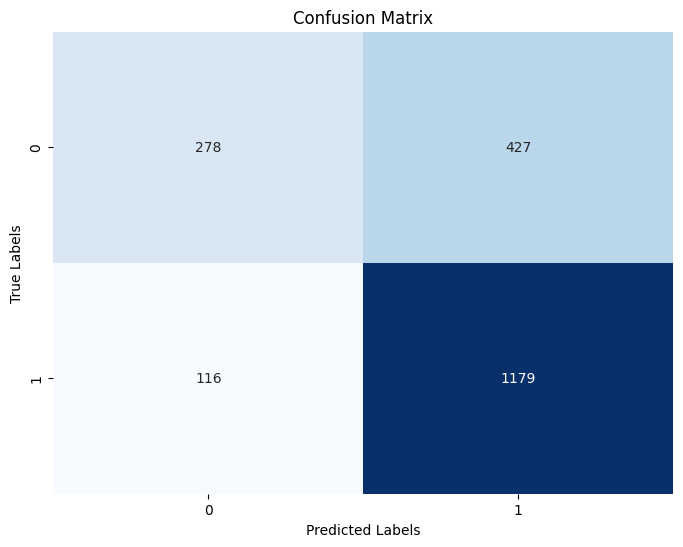

----Model on Training data-----
Training accuracy score: 0.7350000000000001
Training classification Report 
:               precision    recall  f1-score   support

           0       0.90      0.59      0.71      2795
           1       0.81      0.96      0.88      5205

    accuracy                           0.83      8000
   macro avg       0.86      0.78      0.80      8000
weighted avg       0.84      0.83      0.82      8000

training f1_score: 0.8822081575246132


In [35]:
classifier_metrics1(hgb)

Testing accuracy: 0.7221
testing f1_score: 0.8066951099442075
Classification report 
:               precision    recall  f1-score   support

           0       0.73      0.26      0.38       705
           1       0.70      0.95      0.81      1295

    accuracy                           0.71      2000
   macro avg       0.72      0.60      0.59      2000
weighted avg       0.71      0.71      0.66      2000



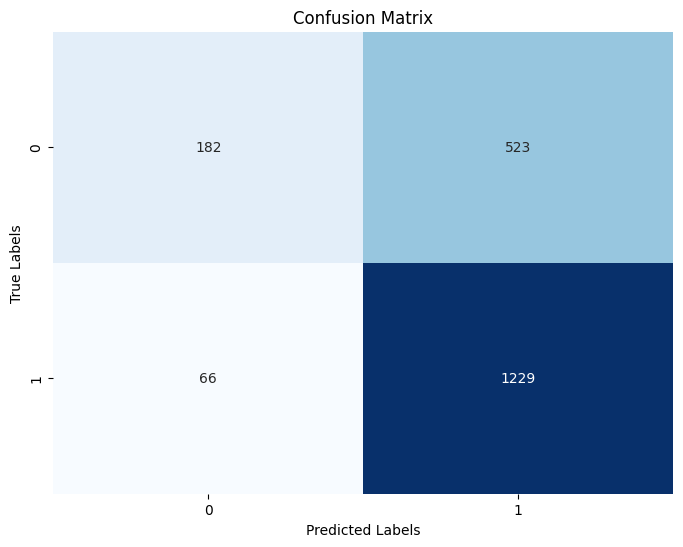

----Model on Training data-----
Training accuracy score: 0.71825
Training classification Report 
:               precision    recall  f1-score   support

           0       0.90      0.37      0.53      2795
           1       0.74      0.98      0.85      5205

    accuracy                           0.77      8000
   macro avg       0.82      0.68      0.69      8000
weighted avg       0.80      0.77      0.73      8000

training f1_score: 0.8452153705701718


In [36]:
classifier_metrics1(hgb1)

## Conclusion

The story the data tells for sucessful clicks is:
1. keep more ads in Afternoon and Morning
2. Advertisers should make advertisements Targeting age group of 20-29 and 30-39
3. Ads should be more on Entertainment and Shopping
4. For more sucessful clicks the position of AD should be at bottom

## Conclusion on ML algorithm

I have created models on 2 scenarios of dataset
1. On imputed dataset using KNN Imputer
2. On Original Data Which contains Null values 

After a lot of HyperParameter Tuning in both Scenarios I conclude that Out of both Scenarios in Second Scenario Either We can use RandomForest(rf1) as it slightly outperforms HistGradientBoosting(hgb1)